In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
data = pd.read_csv("CC GENERAL.csv") # Veri yükleme ve genel bakış
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info() # Veri seti hakkında temel bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe() # Veri seti hakkındaki istatistik bilgileri

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


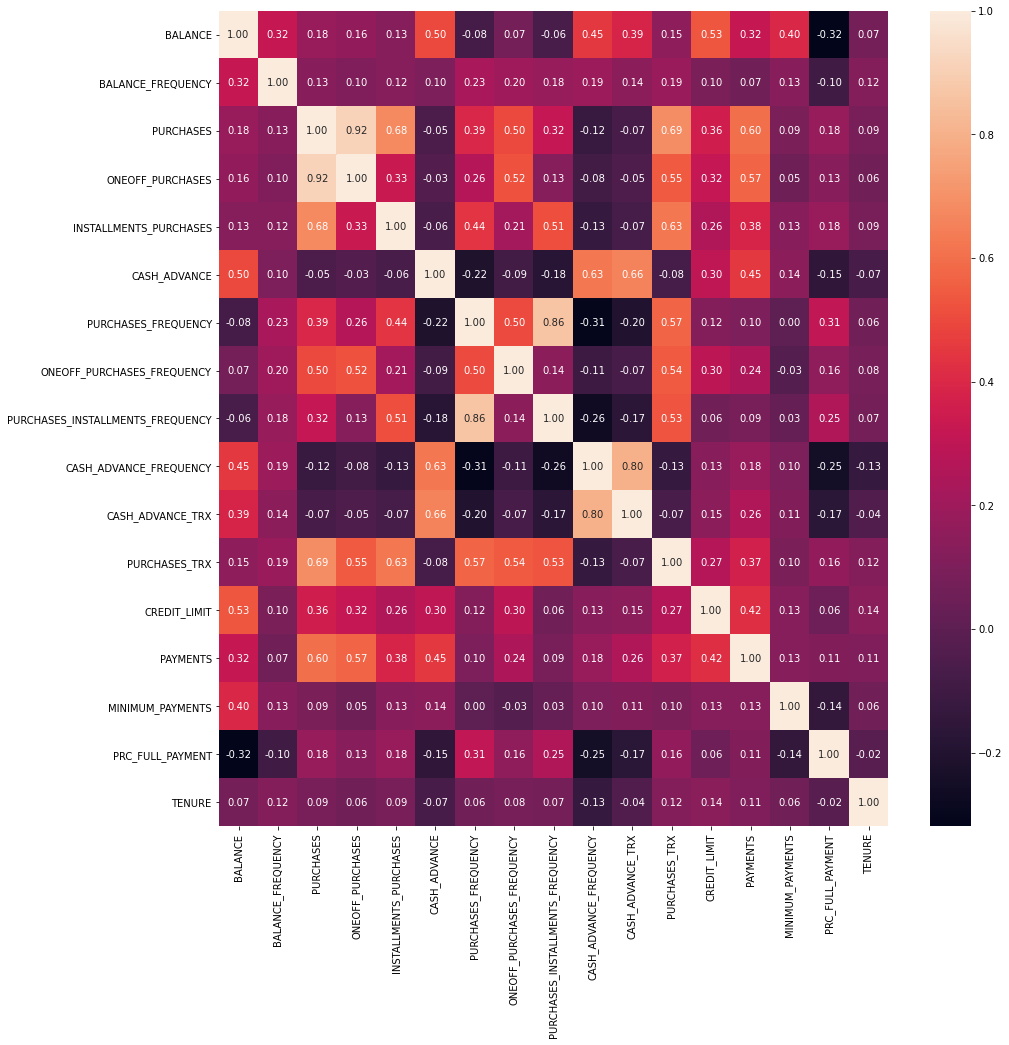

In [6]:
plt.figure(figsize= (15,15)) # Özelliklerin birbiri ile korelasyonunun gösterilmesi
sns.heatmap(data.corr(), annot = True, fmt = ".2f")
plt.show()

In [7]:
data.drop("CUST_ID", axis = 1,inplace = True) # Kullanılmayacak olan ID sütununun çıkarılması
idx = data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),:].index.values # Null değerlere sahip verilere atamadan sonra bakmak için indexlerinin tutulması
data['MINIMUM_PAYMENTS'].fillna((data['CREDIT_LIMIT'] - data["BALANCE"])*10/100, inplace=True) # Null değere sahip kısımlara yapılan atamalar

In [8]:
data.loc[idx,["BALANCE","CREDIT_LIMIT","MINIMUM_PAYMENTS"]] # Atanan verilere bakış

,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS
3,1666.670542,7500.0,583.332946
45,2242.311686,2400.0,15.768831
47,3910.111237,4200.0,28.988876
54,6.660517,1000.0,99.333948
55,1311.995984,6000.0,468.800402
...,...,...,...
8919,14.524779,1500.0,148.547522
8929,371.527312,1500.0,112.847269
8935,183.817004,1500.0,131.618300
8944,193.571722,4000.0,380.642828


In [9]:
idx2 = data.loc[(data['CREDIT_LIMIT'].isnull()==True),:].index.values # Null değerlere sahip verilere atamadan sonra bakmak için indexlerinin tutulması
data['CREDIT_LIMIT'].fillna(data[(data["PURCHASES"] == 0) & (data["CASH_ADVANCE"] != 0) & 
                                 (data["PAYMENTS"] < 500) & (data["MINIMUM_PAYMENTS"] < 500)]["CREDIT_LIMIT"].mean(), inplace=True) # Benzer verilere göre null değerin atanması

In [10]:
data.iloc[idx2, :] # Atanan veriye bakış

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,2158.687616,9.040017,14.418723,0.0,6


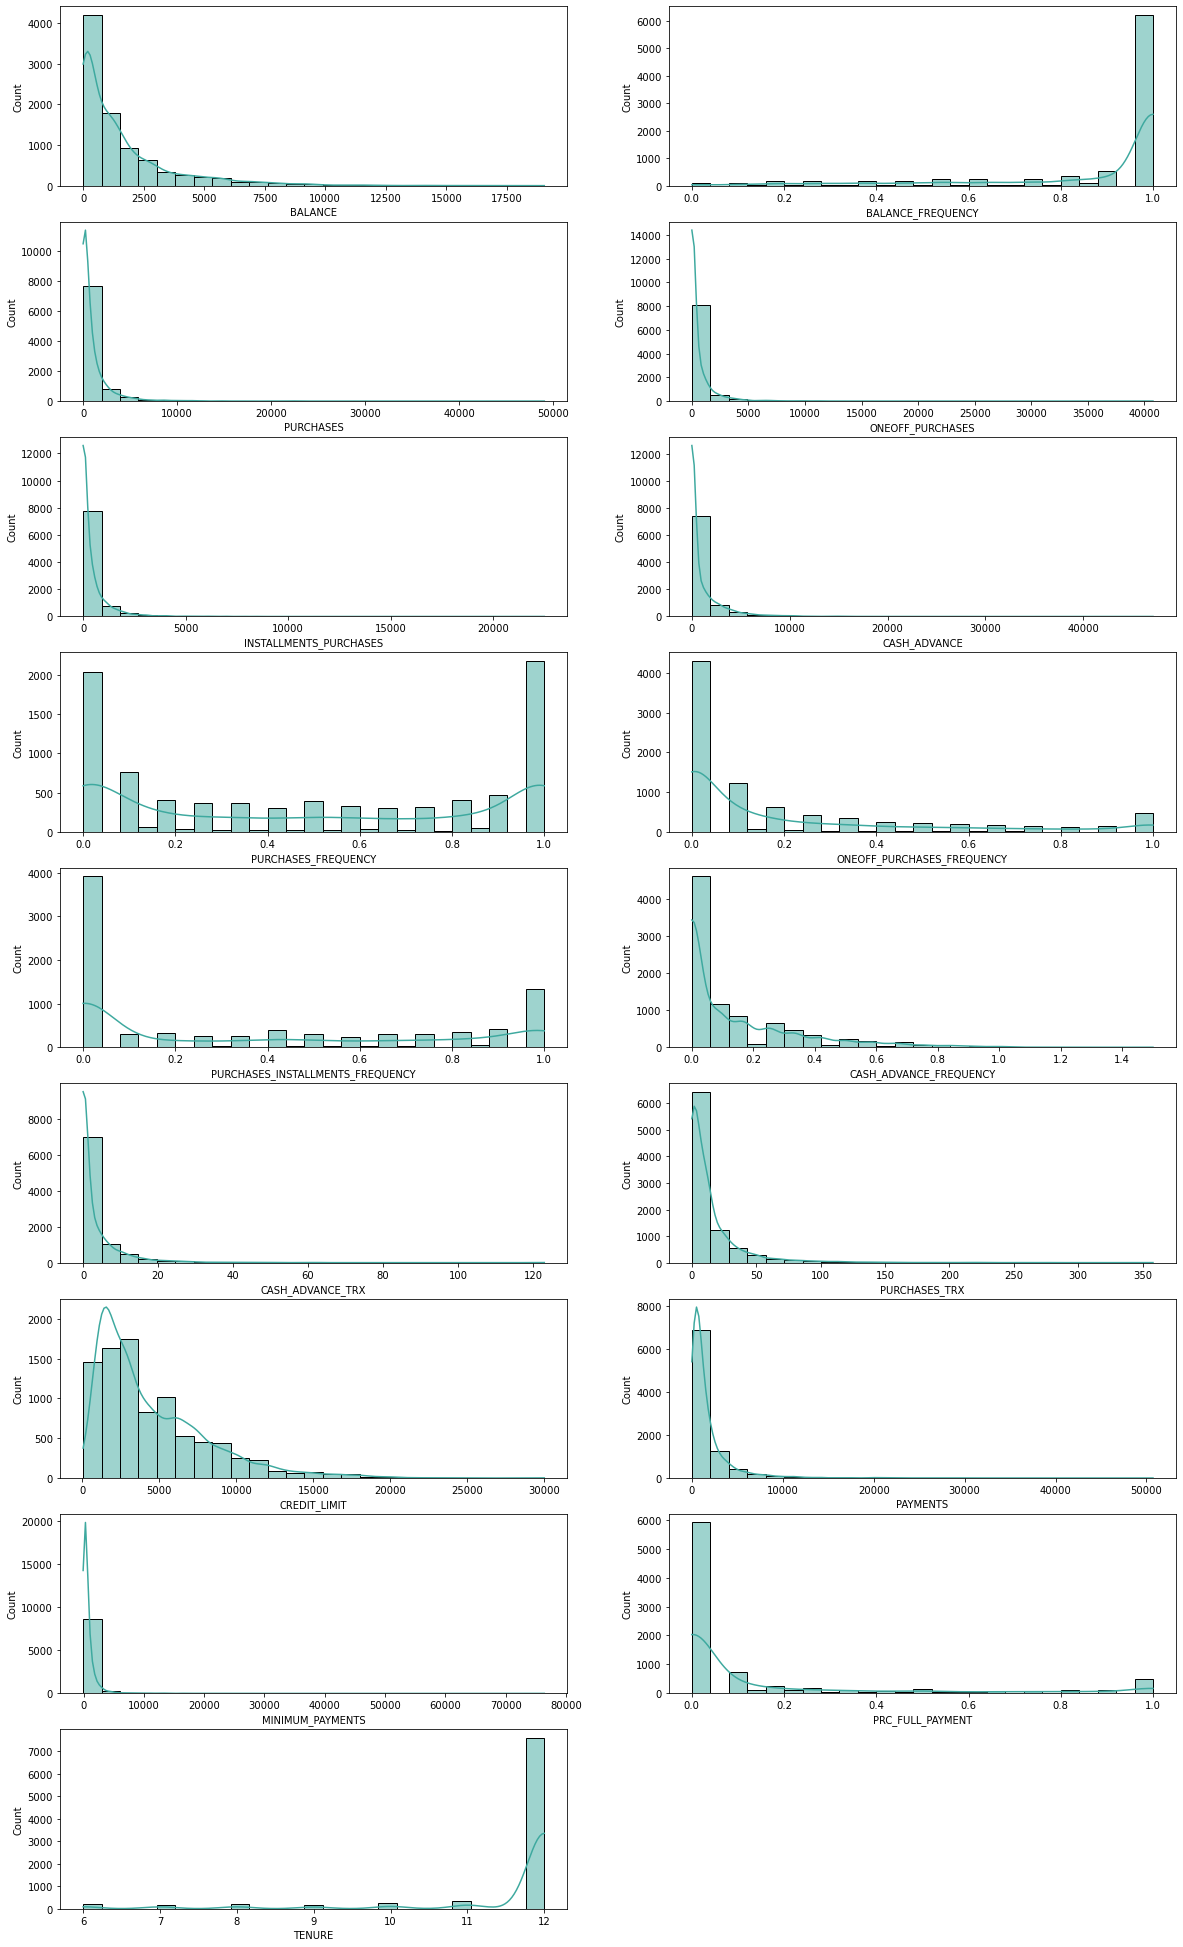

In [11]:
# Veri setinin özelliklere göre dağılımının gözlenmesi
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns): 
    ax = plt.subplot(9, 2, i+1)
    sns.histplot(data[col], bins = 25 ,kde= True,color = "#3EA99F")
    plt.xlabel(col)
        
plt.show()

In [12]:
# Veri setindeki özelliklerin değerlerini yakın aralıklara getirme
sc = StandardScaler() 
scaled_data = sc.fit_transform(data)

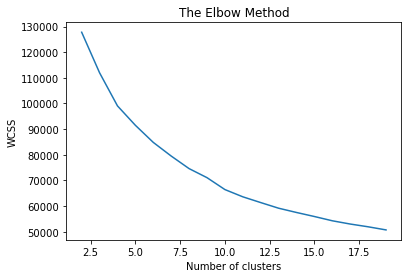

In [13]:
# Farklı küme sayıları deneyerek en doğru küme sayısını bulmaya çalışma
wcss = []
silhoutte_scores = []
for i in range(2,20): 
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhoutte_scores.append(silhouette_score(scaled_data, kmeans.labels_))
plt.plot(range(2,20),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

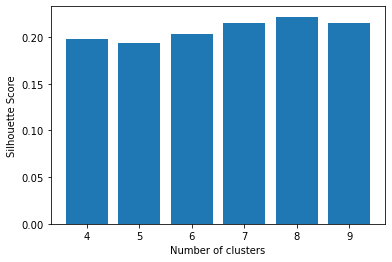

In [14]:
# Elbow metoduna göre uygun olabilecek değerleri seçmek için farklı bir metod kullanımı
k = [4, 5, 6, 7, 8, 9] 
plt.bar(k, silhoutte_scores[2:8]) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [15]:
# Uygun bulunan küme sayısını veri setine uygulama
kmeans2=KMeans(n_clusters=8, init="k-means++",random_state=0) 
kmeans2.fit(scaled_data)
scaled_dataf = pd.DataFrame(scaled_data, columns=data.columns) 
data["Cluster_ID"] = kmeans2.labels_ # Elde edilen değerleri veri setine ekleme
scaled_dataf["Cluster_ID"] = kmeans2.labels_

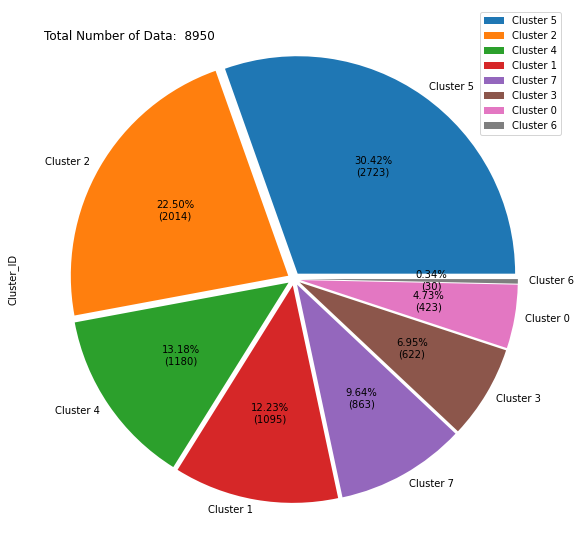

In [16]:
plt.figure(figsize=(10,10))  # Yapılan işlem sonucunda oluşan kümelerdeki eleman sayılarının dağılımı
total = data.Cluster_ID.value_counts().sum()
label_number = list(data.Cluster_ID.value_counts().index.values)
str_list = [str(element) for element in label_number]
labels = ["Cluster "+str_list[0],"Cluster "+str_list[1],"Cluster "+str_list[2],"Cluster "+str_list[3],"Cluster "+str_list[4],"Cluster "+str_list[5], "Cluster "+str_list[6], "Cluster "+str_list[7]]
def val_per(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
data.Cluster_ID.value_counts().plot.pie(labels =labels ,autopct=val_per, pctdistance=.6, labeldistance=1.05, explode = [.03, .03, .03, .03, .03, .03, .03, .03])
plt.text(-1.15, 1.1, 'Total Number of Data:  {}'.format(total), fontsize = 12)
plt.legend()
plt.show()

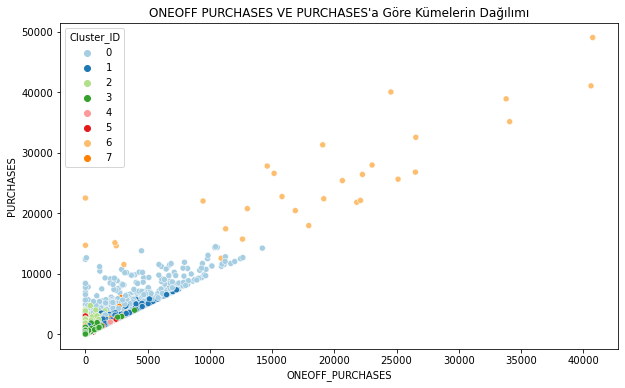

In [17]:
# İki özelliğin kümelere göre değerleri
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='Cluster_ID', palette = sns.color_palette("Paired",8))
plt.title("ONEOFF PURCHASES VE PURCHASES'a Göre Kümelerin Dağılımı")
plt.show()

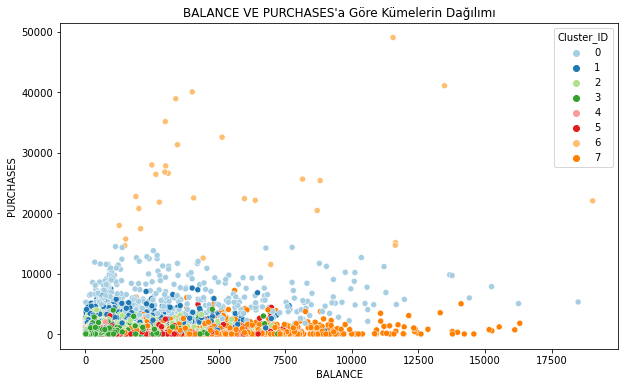

In [18]:
# İki özelliğin kümelere göre değerleri
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='BALANCE', y='PURCHASES', hue='Cluster_ID', palette = sns.color_palette("Paired",8))
plt.title("BALANCE VE PURCHASES'a Göre Kümelerin Dağılımı")
plt.show()

In [19]:
data.groupby("Cluster_ID").mean() # Kümelere göre ortalama özellikler

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_ID,,,,,,,,,,,,,,,,,
0,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1890.754604,0.242857,11.964539
1,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,478.501359,0.272564,11.866667
2,805.434029,0.956257,923.973297,187.048203,737.368630,216.451679,0.888339,0.087030,0.844106,0.040043,0.784508,19.383317,3546.881928,1106.220084,784.240094,0.245754,11.861966
3,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2427.136154,596.373827,335.386511,0.157813,7.229904
4,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,188.441727,0.236063,11.783898
5,1602.633513,0.972801,230.371307,182.599218,47.953830,795.524463,0.142599,0.080054,0.063312,0.157803,3.094381,2.616967,3381.956176,1014.321251,830.545333,0.020211,11.881748
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,5092.510978,0.970379,540.977346,334.783059,206.312097,5215.305262,0.300087,0.139176,0.201125,0.519513,16.486674,8.141367,8265.532498,4119.551211,2159.403803,0.038829,11.611819


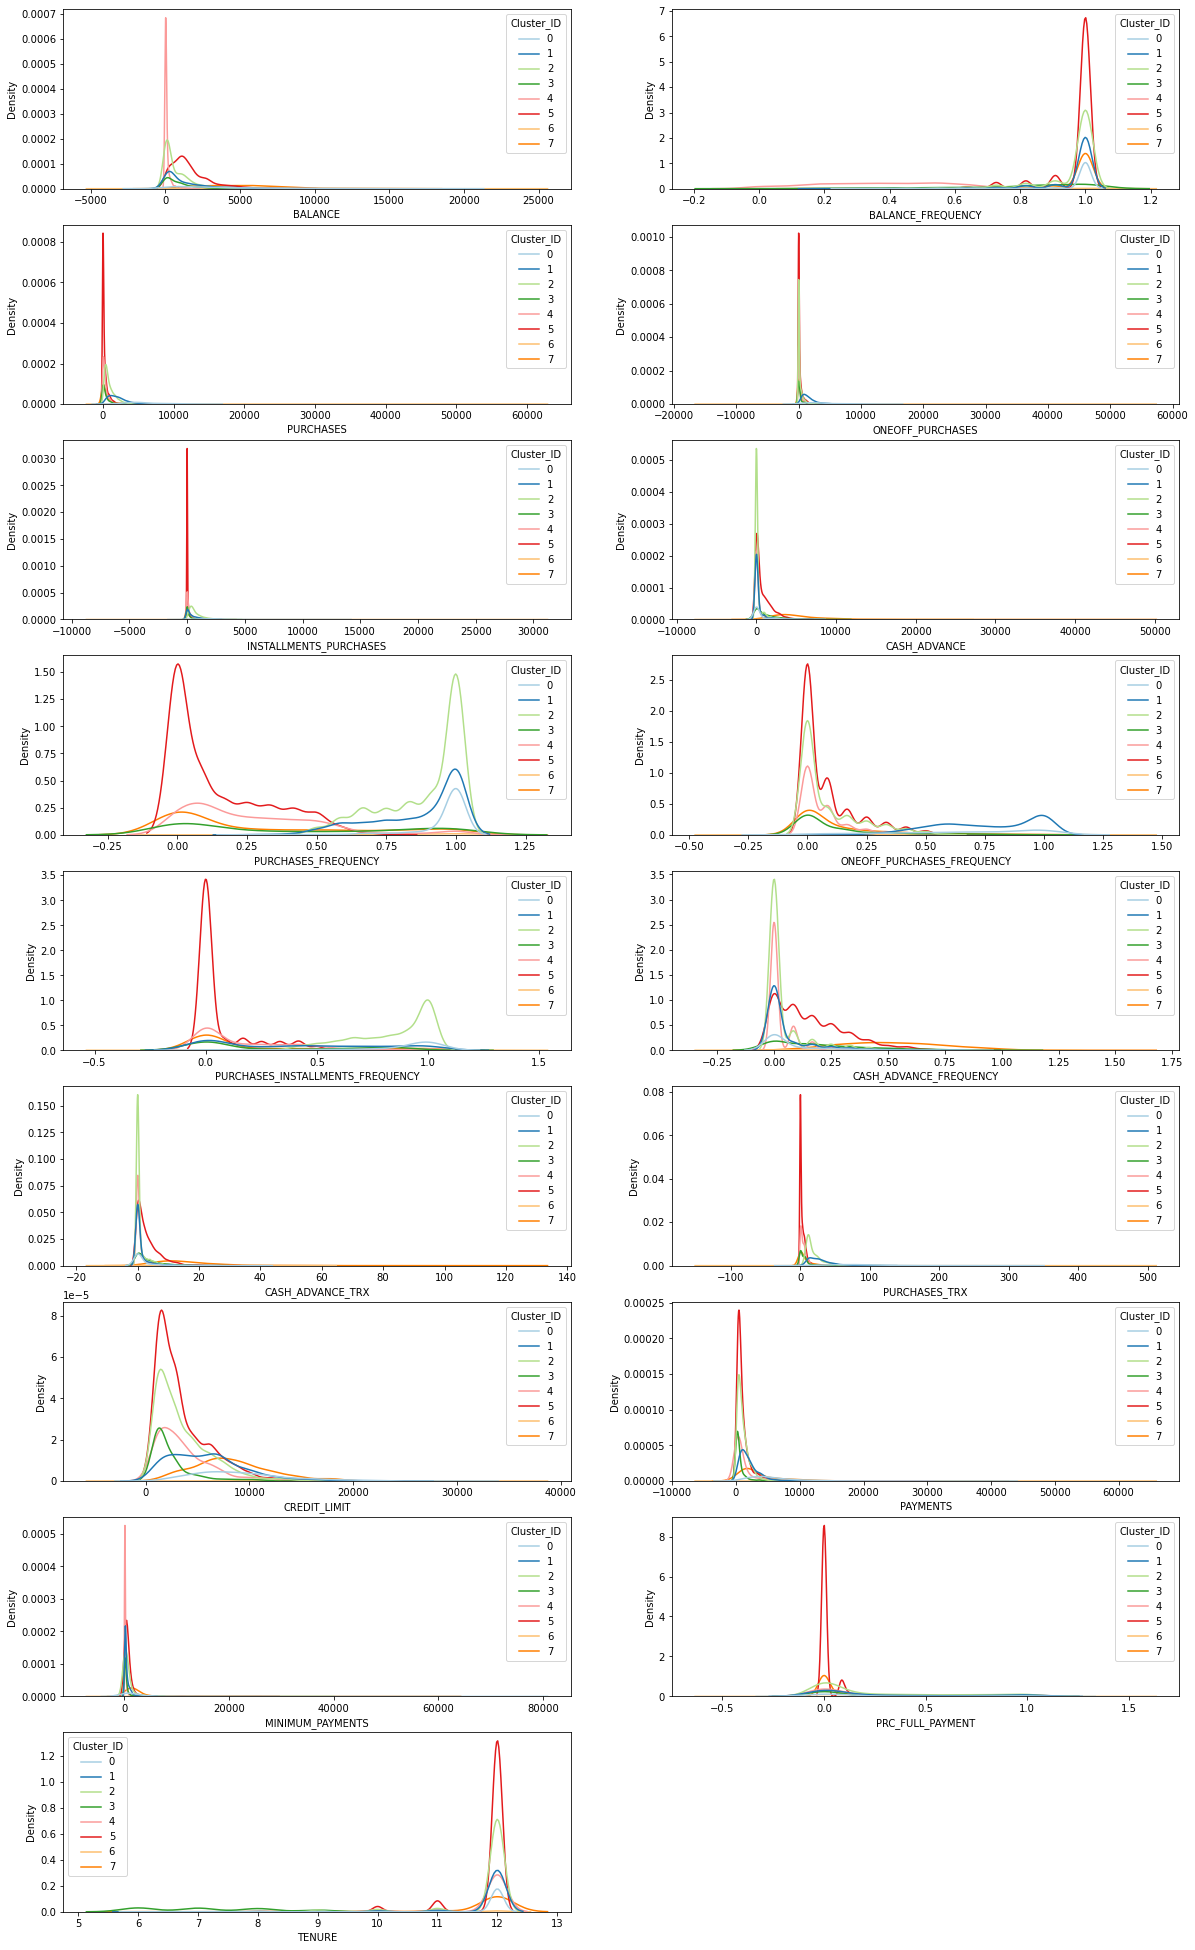

In [18]:
# Özelliklerin kümelere göre gösterimi
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns[:-1]):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data=data, x=col, hue="Cluster_ID", palette=sns.color_palette("Paired",8))
    plt.xlabel(col)
        
plt.show()

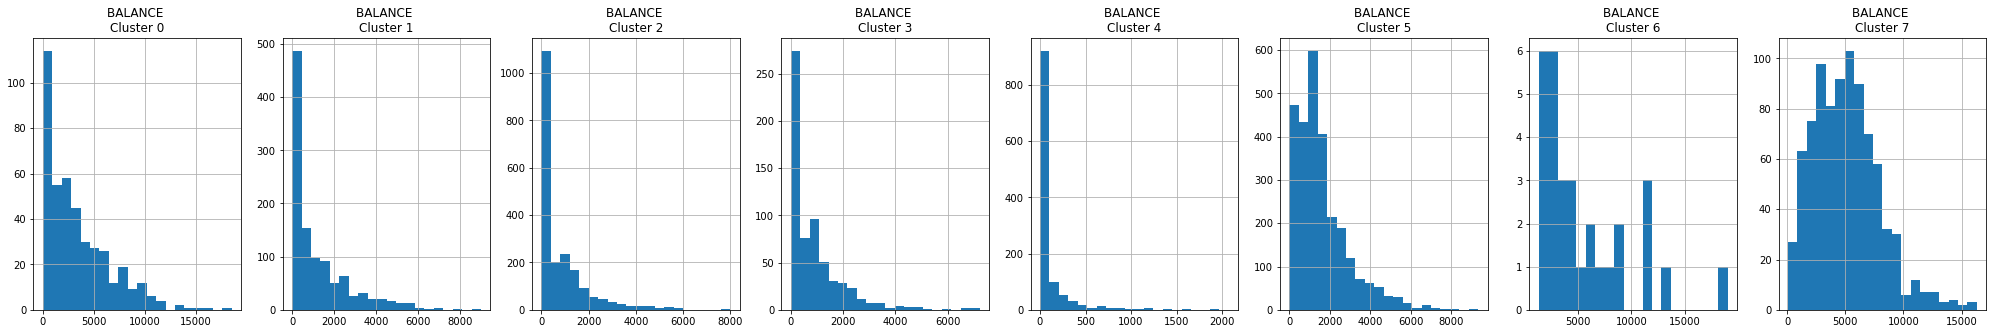

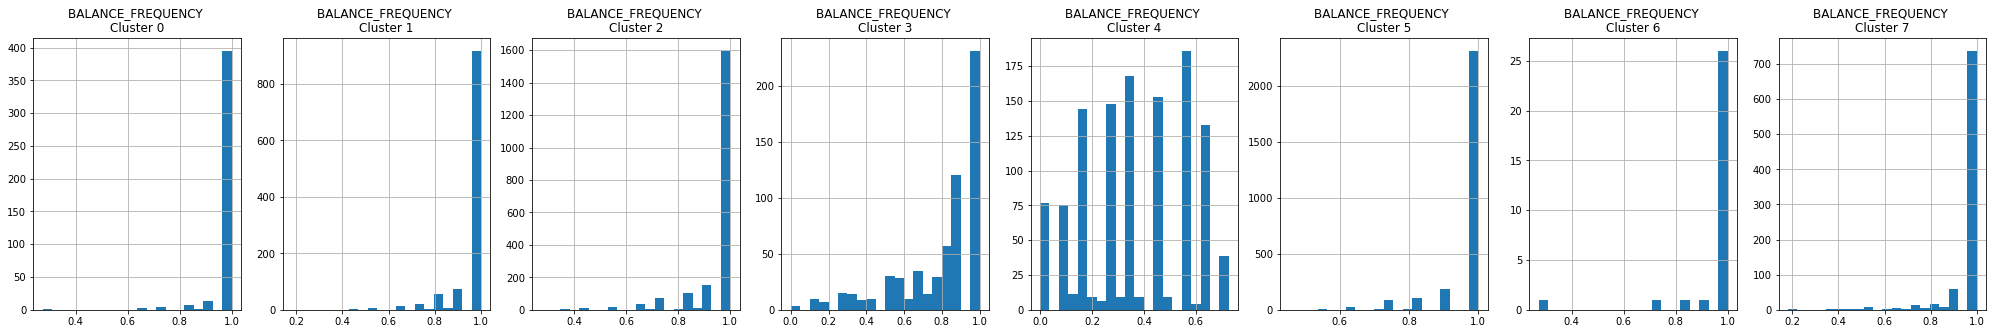

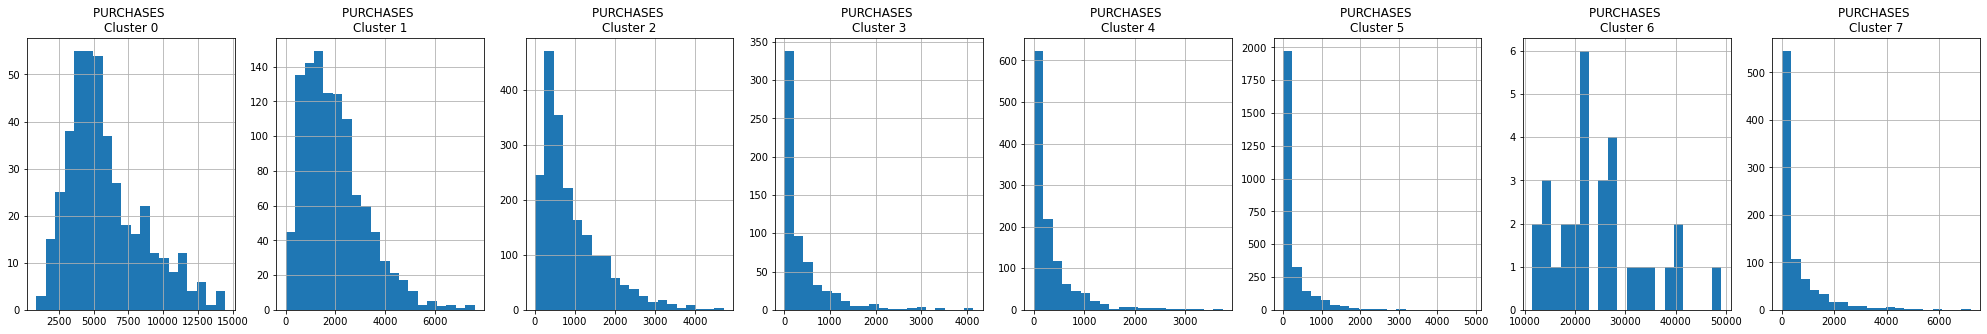

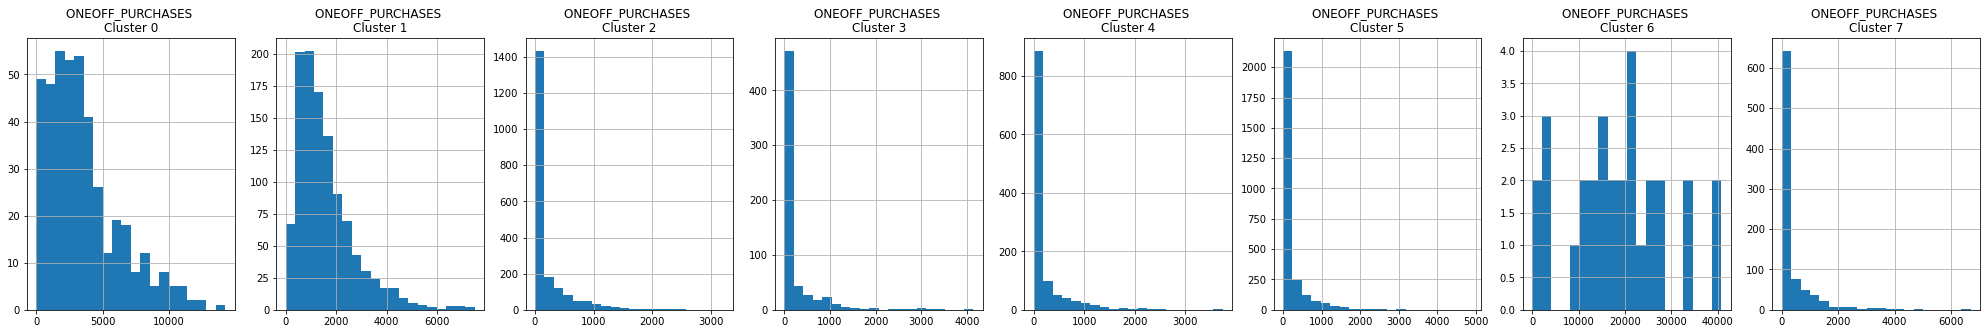

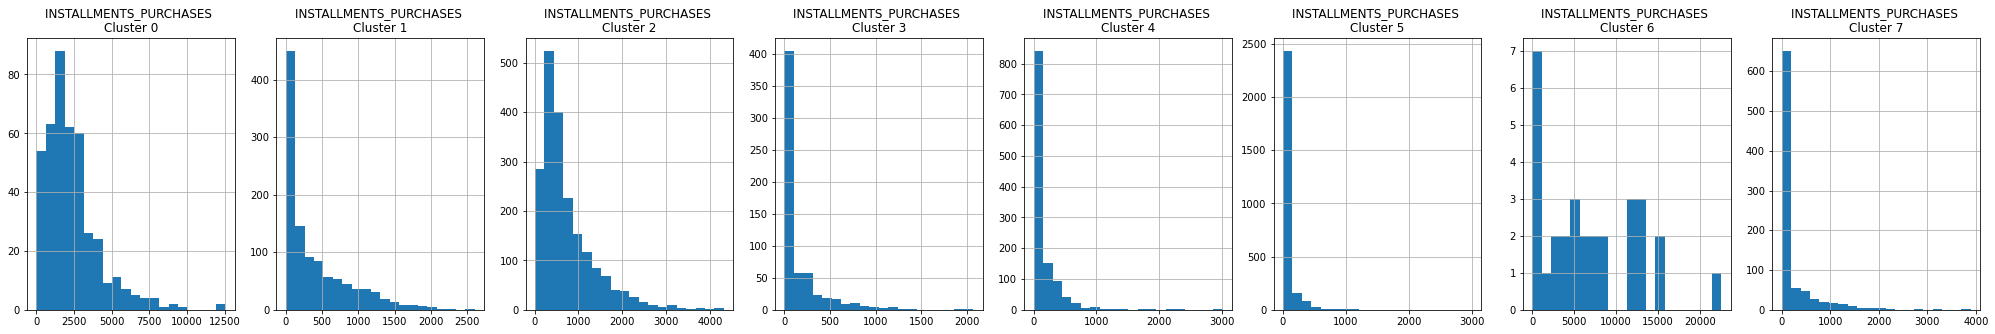

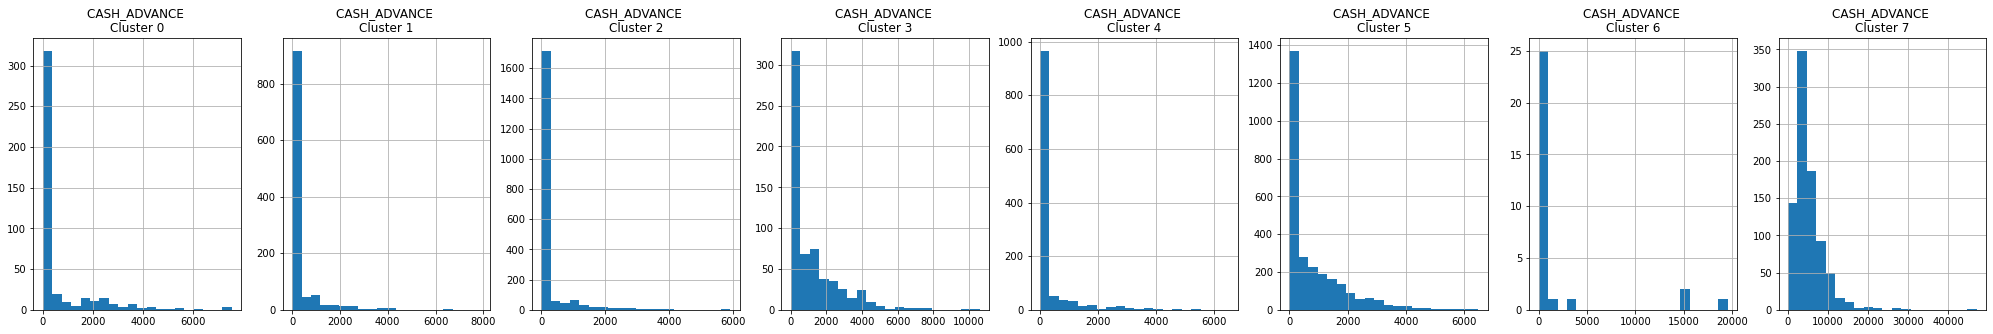

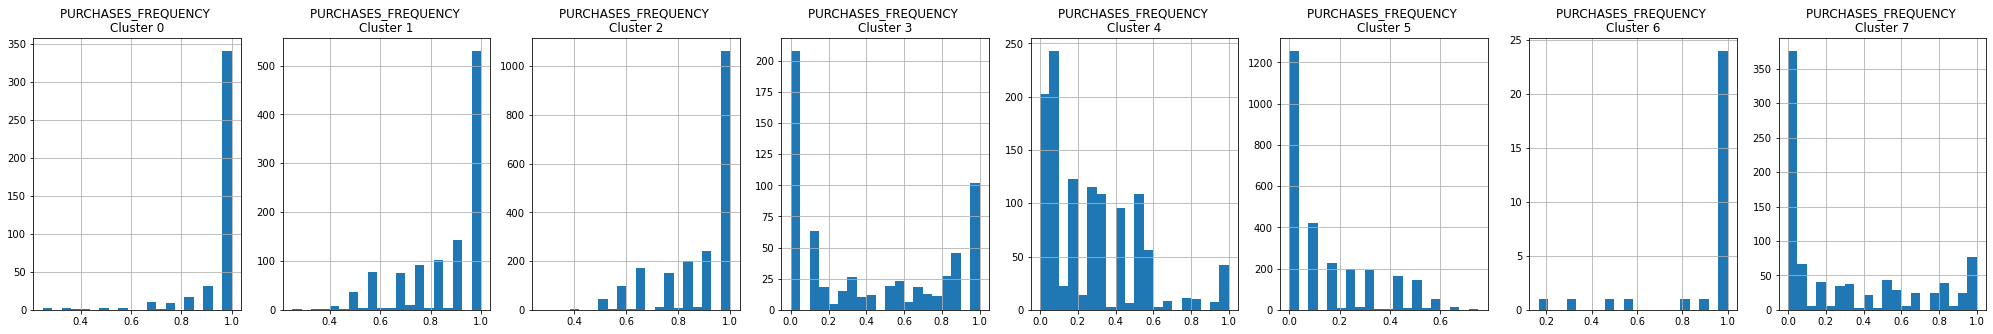

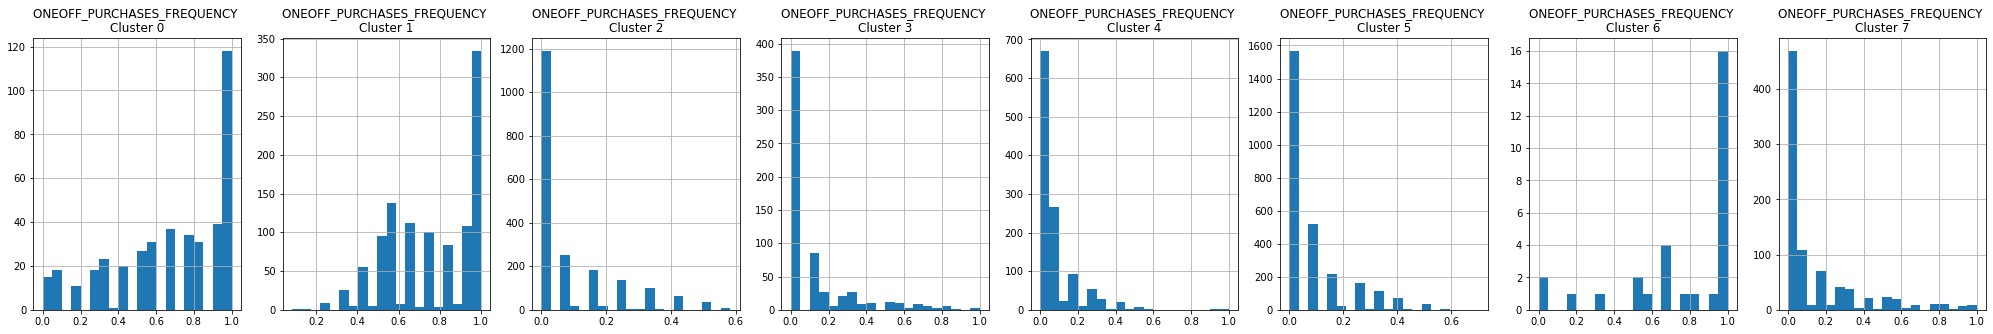

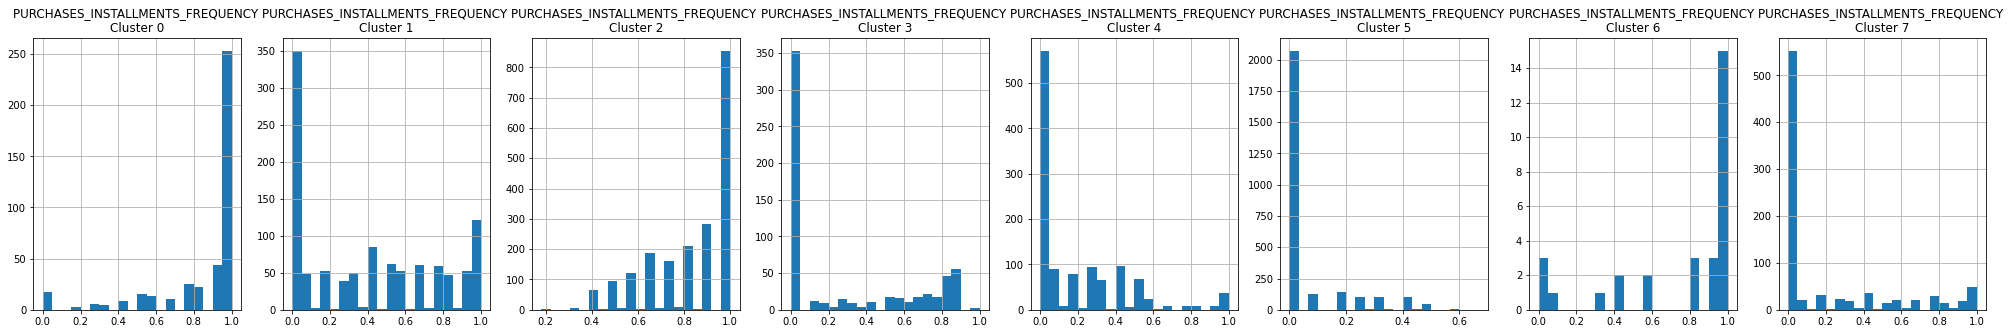

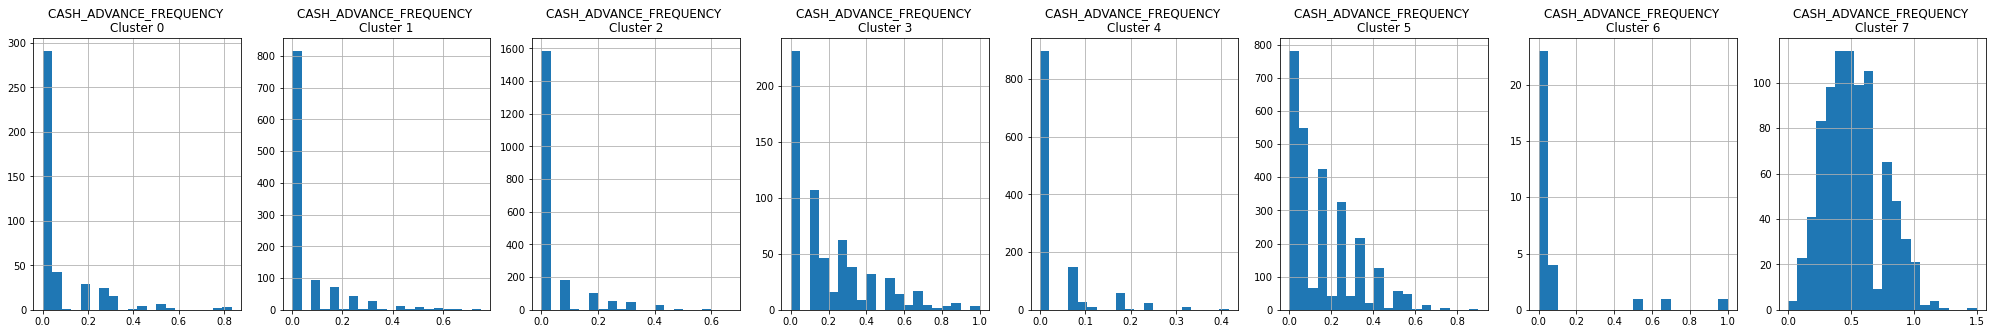

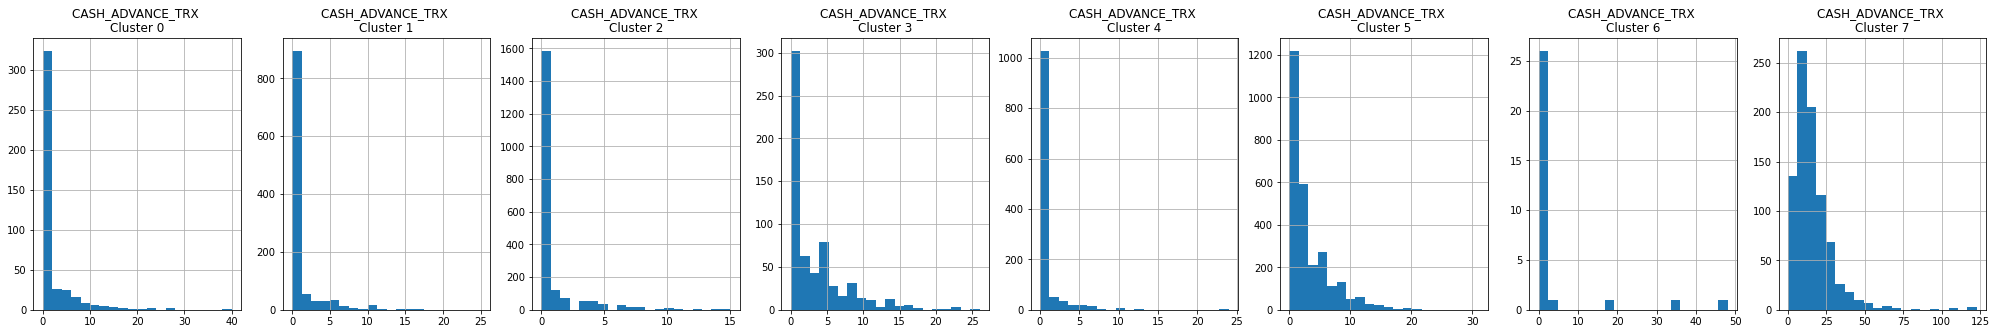

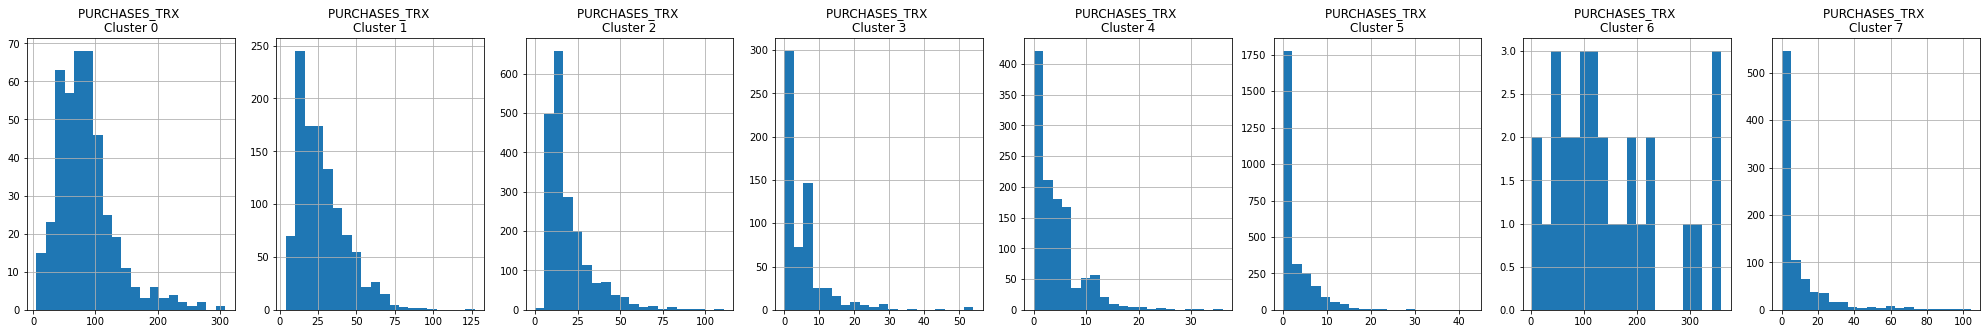

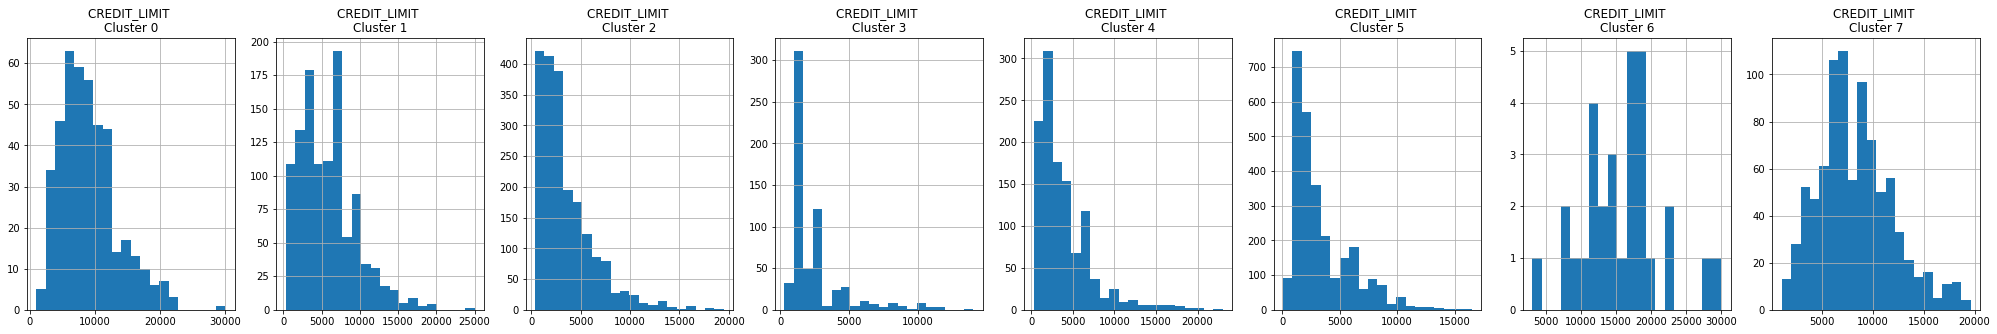

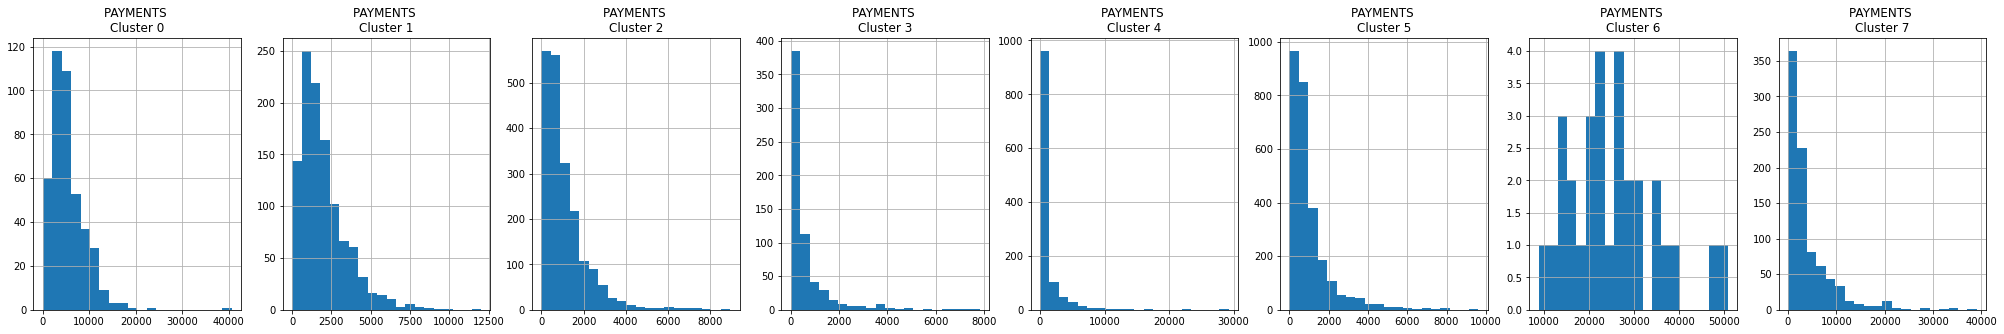

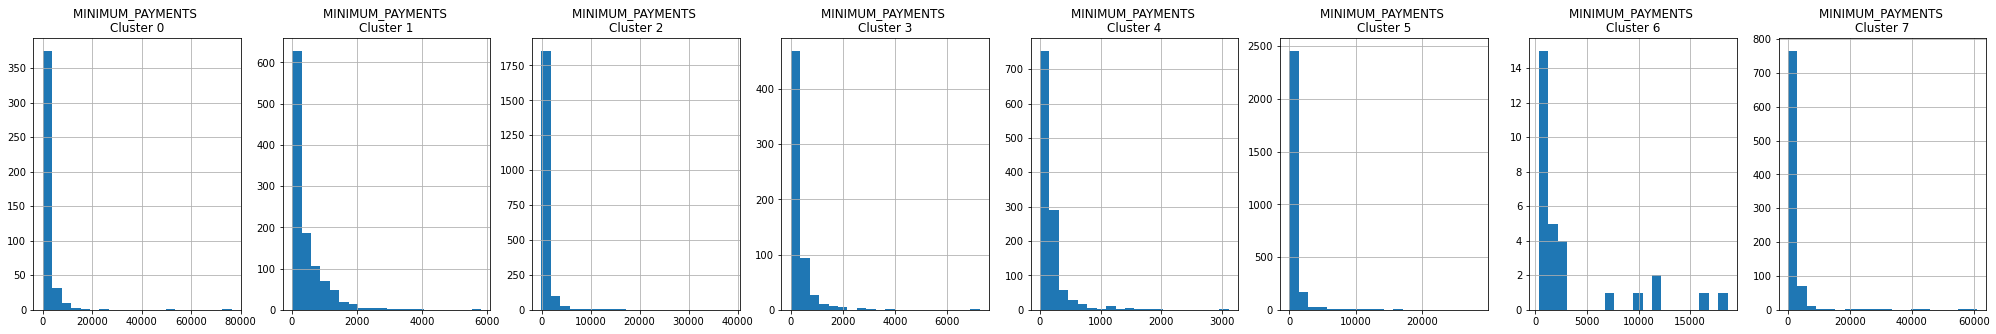

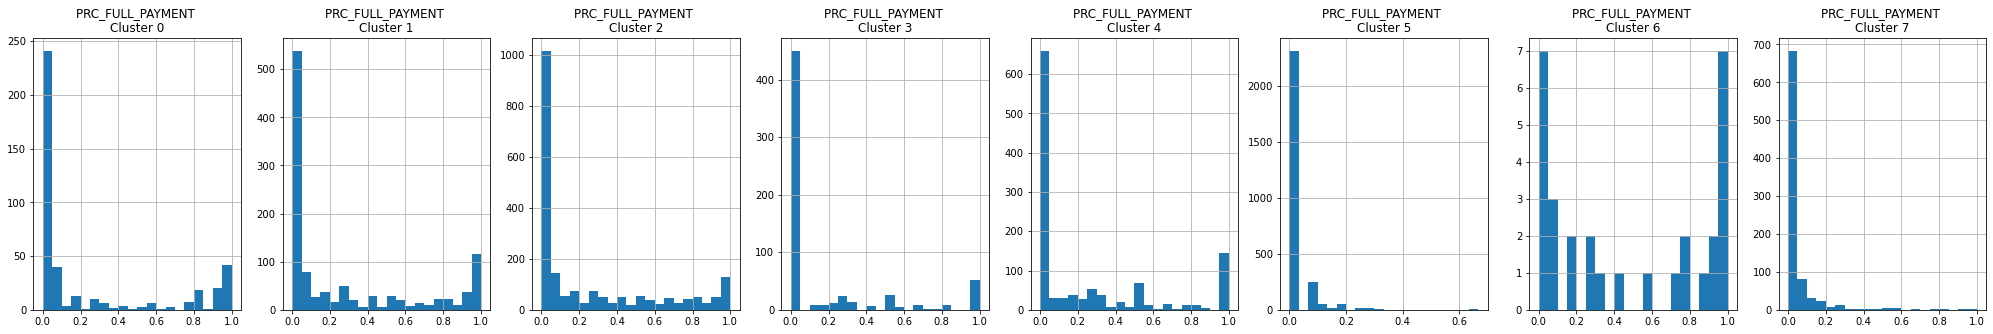

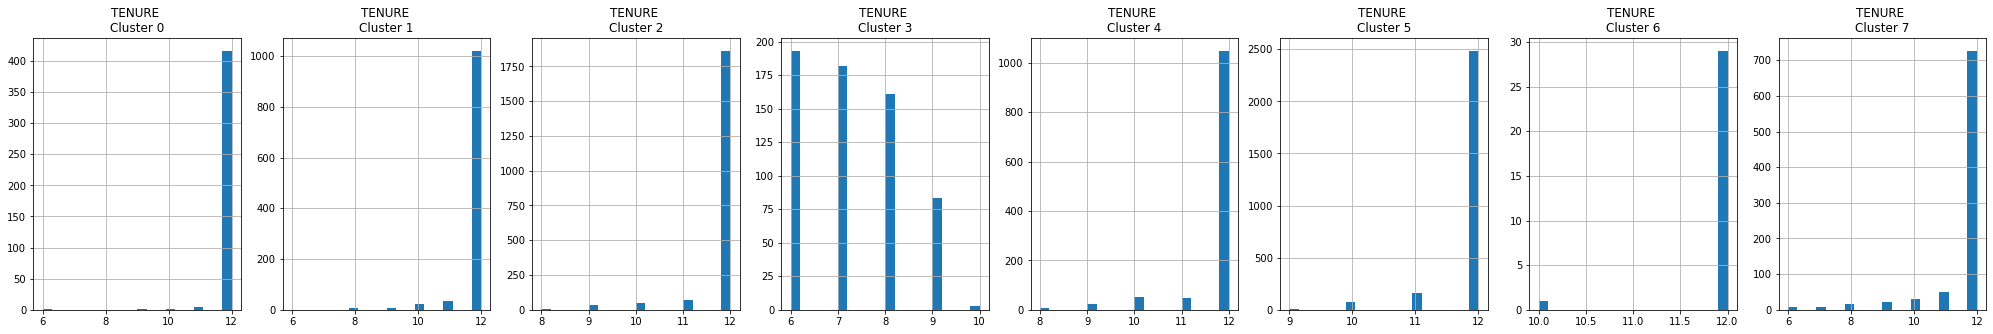

In [23]:
# Özelliklerin kümelere göre gösterimi
for i in data.columns[:-1]:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = data[data['Cluster_ID'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
plt.show()

In [24]:
# PCA ile verinin değerini koruyarak özellik sayısını azaltma
new_scaled = scaled_dataf.loc[:,scaled_dataf.columns != "Cluster_ID"]
pca = PCA(n_components=0.90, random_state=0)
pca.fit(new_scaled)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(new_scaled), columns=PC_names)

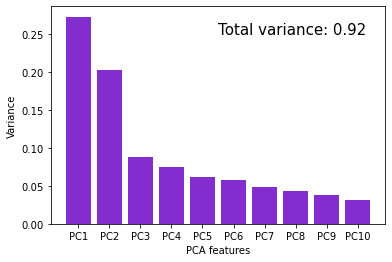

In [25]:
# Oluşturulan yeni özelliklerin ifade ettiği veri açısından önem sıralaması
plt.bar(PC_names, pca.explained_variance_ratio_, color = "#842DCE")
plt.xlabel('PCA features')
plt.ylabel('Variance')
plt.text(4.5,0.25,"Total variance: {}".format(round(pca.explained_variance_ratio_.sum(),2)),fontsize = 15)
plt.show()

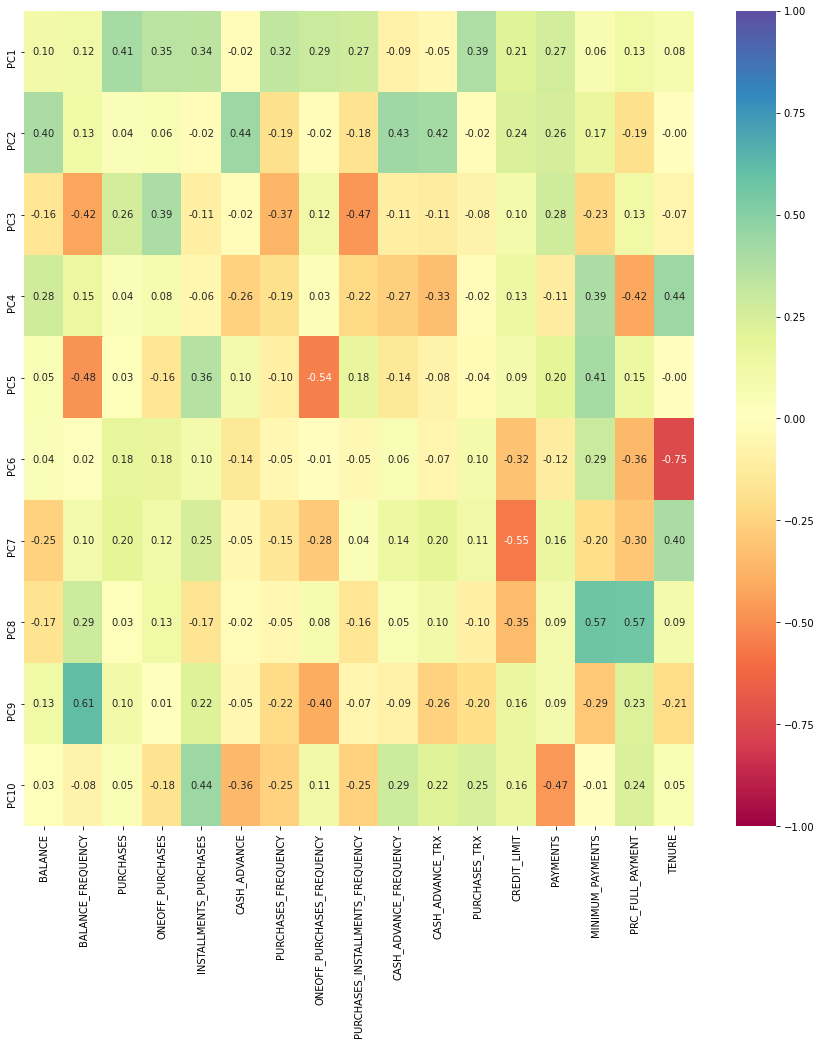

In [26]:
# Yeni özelliklerin orijinal özelliklerden ne kadar katkı aldığının gösterimi
pca_cont = pd.DataFrame(pca.components_, columns = new_scaled.columns, index = PC_names)
plt.figure(figsize= (15,15))
sns.heatmap(pca_cont, annot = True, fmt = ".2f", vmin = -1, vmax = 1, cmap = "Spectral")
plt.show()

In [27]:
# Görselleştirme yapmak amacıyla veriyi 2 özelliğe indirgeme
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(new_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster_ID': kmeans2.labels_})], axis = 1)

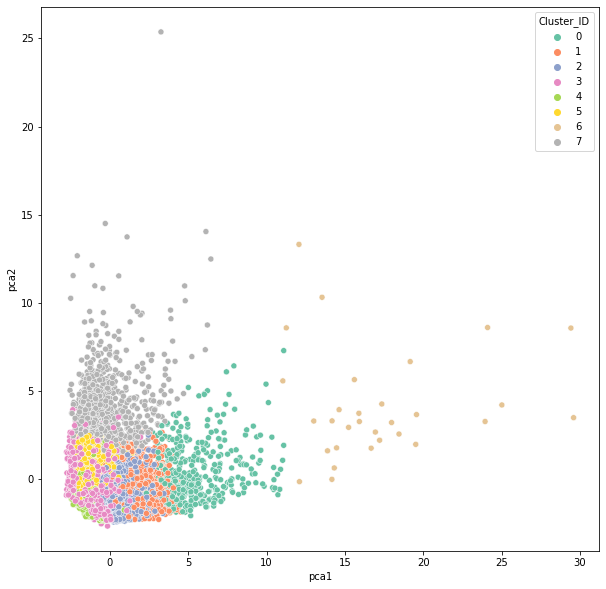

In [28]:
# İki özellik veriyi yeteri kadar ifade edemese bile bunların kümelere göre değerlerinin gösterimi
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'Cluster_ID', data = pca_df, palette = sns.color_palette("Set2"))
plt.show()